In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy
import pandas
import os
from matplotlib import pyplot
import seaborn
from plotly import express
import plotly.graph_objects as go
import sklearn
from sklearn import ensemble, linear_model, neighbors, naive_bayes, tree
from sklearn import preprocessing, feature_selection, model_selection, metrics

In [4]:
def readdir():
    wdr=os.getcwd()
    print(wdr)
    allF=os.listdir(wdr)
    winefiles=[]
    for i in allF:
        if ("train" in i and ".csv" in i) or ("test" in i and ".csv" in i):
            winefiles.append(i)
    return winefiles
files=readdir()
print("Available Files for Research: \n",*files,sep="\n")

/content
Available Files for Research: 

train.csv
test.csv


In [5]:
tstwine=pandas.read_csv(files[1],sep=",")
trnwine=pandas.read_csv(files[0],sep=",")

In [6]:
trnwine.head(10)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
5,5,9.9,0.51,0.44,2.2,0.111,30.0,134.0,0.99820,3.11,0.54,9.6,5
6,6,7.2,0.87,0.00,2.3,0.080,6.0,18.0,0.99552,3.34,0.60,11.3,6
7,7,7.5,0.43,0.32,1.8,0.066,18.0,40.0,0.99560,3.30,0.43,9.7,6
8,8,11.6,0.38,0.55,2.2,0.084,17.0,40.0,1.00080,3.17,0.73,9.8,6
9,9,7.8,0.78,0.09,2.2,0.049,13.0,29.0,0.99682,3.51,0.49,9.5,5


In [7]:
tstwine.head(10)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8
5,2061,6.1,0.320,0.25,2.3,0.073,11.0,86.0,0.99464,3.16,0.70,11.2
6,2062,6.7,0.640,0.05,1.8,0.054,6.0,14.0,0.99456,3.35,0.58,10.9
7,2063,12.5,0.370,0.59,1.8,0.079,3.0,16.0,0.99940,3.16,0.68,10.5
8,2064,6.3,0.470,0.32,1.9,0.069,18.0,85.0,0.99580,3.39,0.55,14.0
9,2065,7.9,0.180,0.40,1.7,0.066,23.0,99.0,0.99914,3.31,0.62,10.0


In [8]:
trnwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [9]:
tstwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1372 non-null   int64  
 1   fixed acidity         1372 non-null   float64
 2   volatile acidity      1372 non-null   float64
 3   citric acid           1372 non-null   float64
 4   residual sugar        1372 non-null   float64
 5   chlorides             1372 non-null   float64
 6   free sulfur dioxide   1372 non-null   float64
 7   total sulfur dioxide  1372 non-null   float64
 8   density               1372 non-null   float64
 9   pH                    1372 non-null   float64
 10  sulphates             1372 non-null   float64
 11  alcohol               1372 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 128.8 KB


In [10]:
def quality_viz(wn,typ):
    wnqly=wn['quality'].value_counts().index.tolist()
    wnqly_count=wn['quality'].value_counts().tolist()
    count_wn=pandas.DataFrame({"Quality":wnqly,"Count":wnqly_count})
    fig=express.bar(count_wn,y="Count",x="Quality",text="Count",color="Quality",
              title="Count of Wine Quality({} Data)".format(typ),height=500,width=700)
    fig.update_layout(
        font=dict(
            family="Calibri, Bold",
            size=19,
            color="Blue"
        )
    )
    fig.show()
quality_viz(trnwine,"Train")

In [11]:
def dataviz(wn,param,prmname):
    lvl_alc=[]
    qlv=wn['quality'].unique()
    for i in qlv:
        data=wn[wn['quality']==i]
        lvl_alc.append(round(data[param].mean(),3))
    alcdata=pandas.DataFrame({"Quality":qlv,"{} Level(Avg)".format(prmname):lvl_alc})
    alcdata=alcdata.sort_values(by="{} Level(Avg)".format(prmname),ascending=False)
    fig=express.bar(alcdata,y="{} Level(Avg)".format(prmname),x="Quality",text="{} Level(Avg)".format(prmname),color="Quality",
              title="Average {} Level by Wine Quality".format(prmname),height=400,width=650)
    fig.update_layout(
        font=dict(
            family="Calibri, Bold",
            size=19,
            color="Blue"
        )
    )
    fig.show()
cols=["alcohol","chlorides","pH","sulphates"]
colnames=["Alcohol","Chlorides","pH","Sulphates"]
for i in range(len(cols)):
    dataviz(trnwine,cols[i],colnames[i])

In [12]:
def DetectOutLrs(wn):
    Krtyp=["Mesokurtic","Platykurtic","Leptokurtic"]
    krtcat=["Medium","Low","High"]
    KrtDist=["Normal","Uniform","Laplace"]
    Kurto=wn.kurtosis()
    FetsWnKrt=Kurto.index.tolist()
    ValWnKrt=Kurto.tolist()
    DecisionOutLier=[]
    Alldist=[]
    print("===============================================")
    for k in range(len(FetsWnKrt)):
        print("Details for Feature => {}".format(' '.join(FetsWnKrt[k].split("_")).capitalize()))
        if ValWnKrt[k]==3:
            print("Type: {}\nFrequency: {}\nFeature Data Distribution Type: {}".format(Krtyp[0],krtcat[0],KrtDist[0]))
            DecisionOutLier.append(krtcat[0])
            Alldist.append(KrtDist[0])
        elif ValWnKrt[k]<3:
            print("Type: {}\nFrequency: {}\nFeature Data Distribution Type: {}".format(Krtyp[1],krtcat[1],KrtDist[1]))
            DecisionOutLier.append(krtcat[1])
            Alldist.append(KrtDist[1])
        elif ValWnKrt[k]>3:
            print("Type: {}\nFrequency: {}\nFeature Data Distribution Type: {}".format(Krtyp[2],krtcat[2],KrtDist[2]))
            DecisionOutLier.append(krtcat[2])
            Alldist.append(KrtDist[2])
        pyplot.figure(figsize=(5,3))
        pyplot.title("Boxplot for {}".format(' '.join(FetsWnKrt[k].split("_")).capitalize()),fontsize=20,color="b")
        pyplot.boxplot(wn[FetsWnKrt[k]])
        pyplot.grid()
        pyplot.show()
        print("===============================================")
    print("Removing Outliers by Feature Normalization with High Outlier Frequency")
    kdf=pandas.DataFrame({"Feature":FetsWnKrt,"Kurtosis":ValWnKrt,"Distribution":Alldist,"Outlier Type":DecisionOutLier})
    for d in range(len(DecisionOutLier)):
        if DecisionOutLier[d]!="Low":
            FetAv = wn[FetsWnKrt[d]].dropna().mean()
            FetMx = wn[FetsWnKrt[d]].dropna().max()
            FetMn = wn[FetsWnKrt[d]].dropna().min()
            wn[FetsWnKrt[d]] = wn[FetsWnKrt[d]].apply(lambda x: (x - FetAv ) / (FetMx -FetMn ))
    return wn, kdf

Details for Feature => Id
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


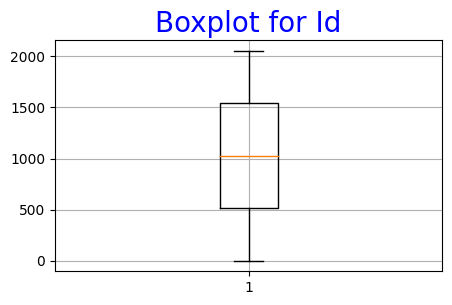

Details for Feature => Fixed acidity
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


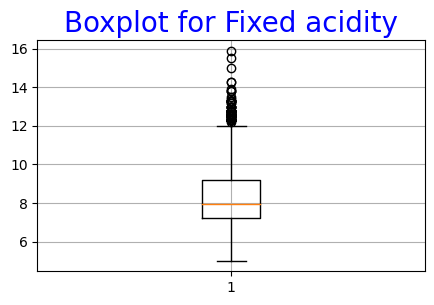

Details for Feature => Volatile acidity
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


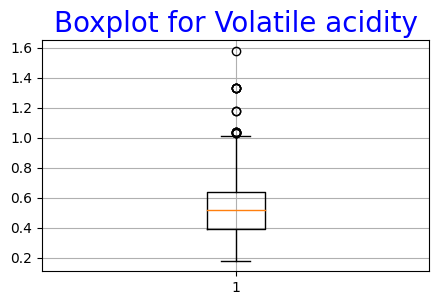

Details for Feature => Citric acid
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


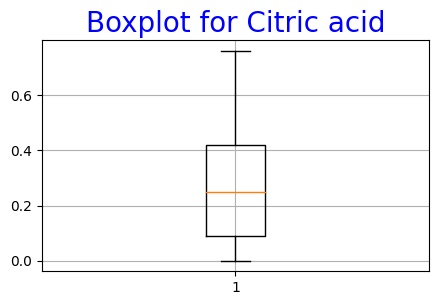

Details for Feature => Residual sugar
Type: Leptokurtic
Frequency: High
Feature Data Distribution Type: Laplace


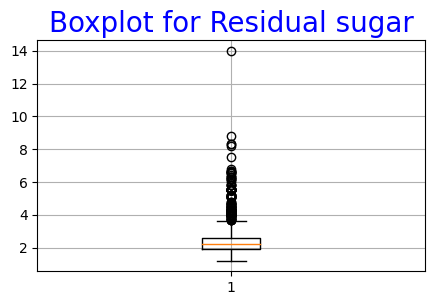

Details for Feature => Chlorides
Type: Leptokurtic
Frequency: High
Feature Data Distribution Type: Laplace


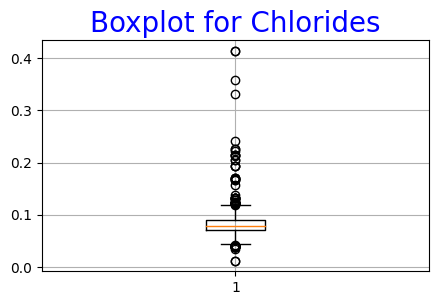

Details for Feature => Free sulfur dioxide
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


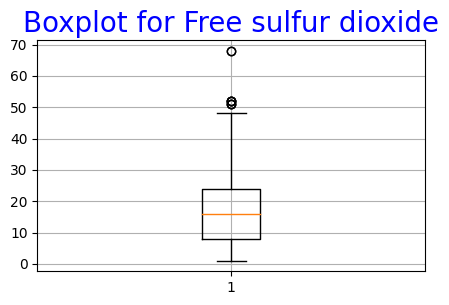

Details for Feature => Total sulfur dioxide
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


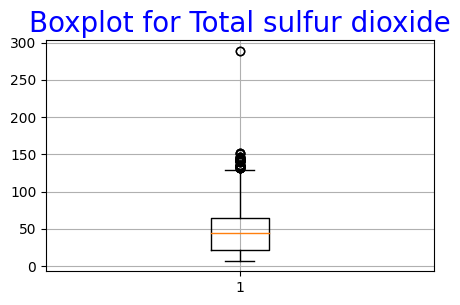

Details for Feature => Density
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


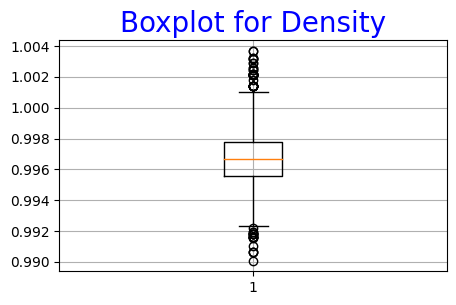

Details for Feature => Ph
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


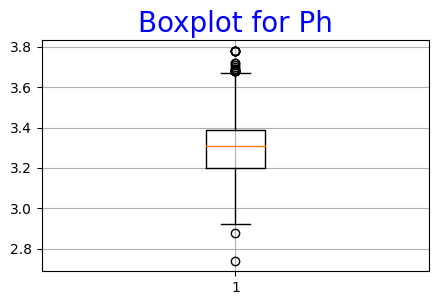

Details for Feature => Sulphates
Type: Leptokurtic
Frequency: High
Feature Data Distribution Type: Laplace


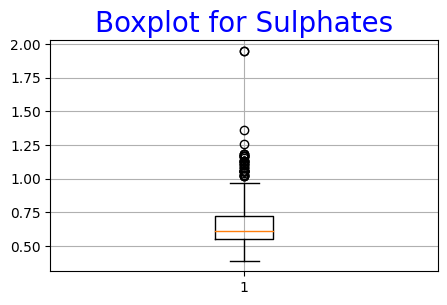

Details for Feature => Alcohol
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


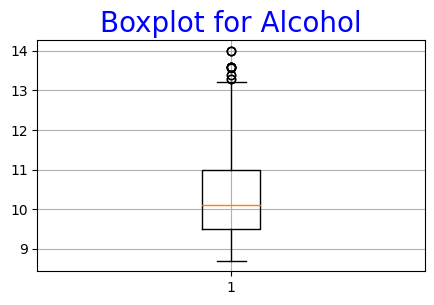

Removing Outliers by Feature Normalization with High Outlier Frequency


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,8.0,0.50,0.39,-0.015538,-0.022030,30.0,39.0,0.99572,3.33,0.082495,12.1
1,1,9.3,0.30,0.73,-0.007725,0.025234,30.0,67.0,0.99854,3.32,0.018392,12.8
2,2,7.1,0.51,0.03,-0.023350,-0.056856,3.0,12.0,0.99660,3.52,0.056854,11.3
3,3,8.1,0.87,0.22,0.015712,0.005333,11.0,65.0,0.99730,3.20,-0.071352,9.8
4,4,8.5,0.36,0.30,-0.007725,-0.007105,10.0,45.0,0.99444,3.20,0.460700,9.5


In [13]:
norm_wine, outlrdf=DetectOutLrs(trnwine.drop('quality',axis=1))
norm_wine.head()

Details for Feature => Id
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


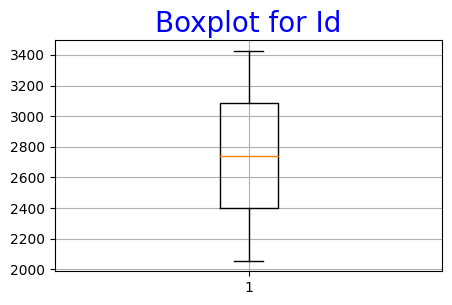

Details for Feature => Fixed acidity
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


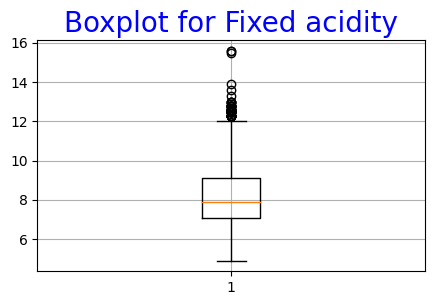

Details for Feature => Volatile acidity
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


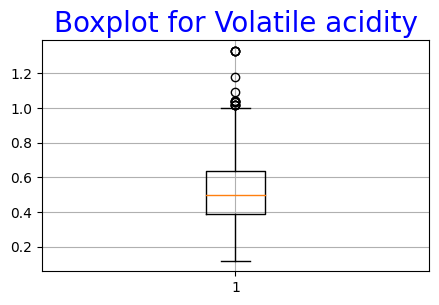

Details for Feature => Citric acid
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


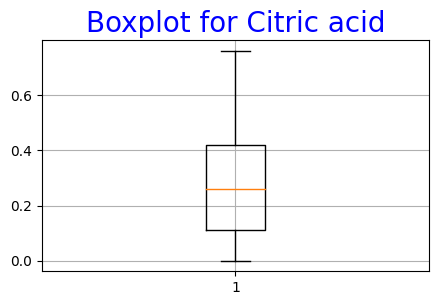

Details for Feature => Residual sugar
Type: Leptokurtic
Frequency: High
Feature Data Distribution Type: Laplace


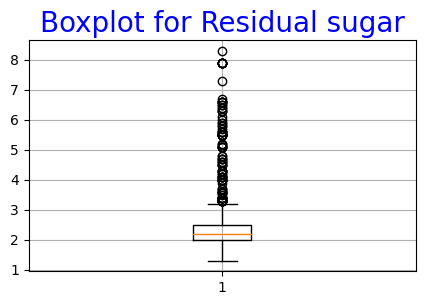

Details for Feature => Chlorides
Type: Leptokurtic
Frequency: High
Feature Data Distribution Type: Laplace


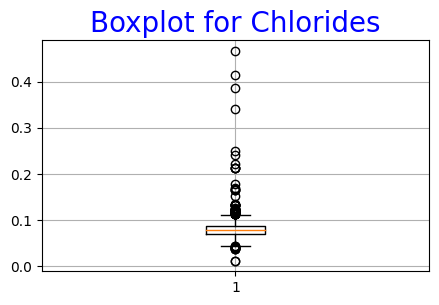

Details for Feature => Free sulfur dioxide
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


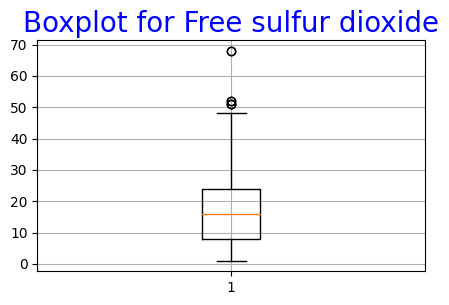

Details for Feature => Total sulfur dioxide
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


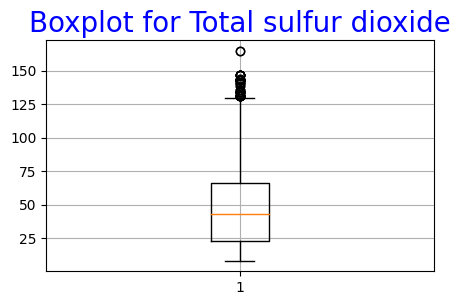

Details for Feature => Density
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


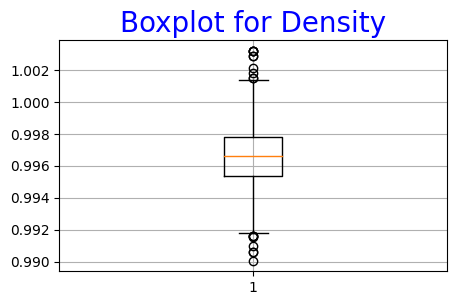

Details for Feature => Ph
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


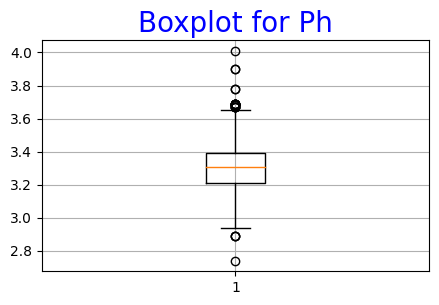

Details for Feature => Sulphates
Type: Leptokurtic
Frequency: High
Feature Data Distribution Type: Laplace


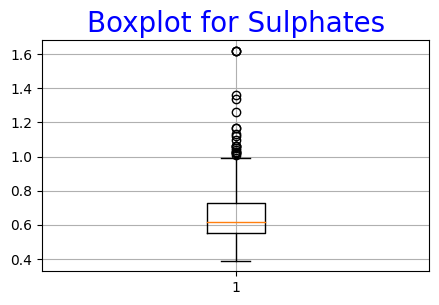

Details for Feature => Alcohol
Type: Platykurtic
Frequency: Low
Feature Data Distribution Type: Uniform


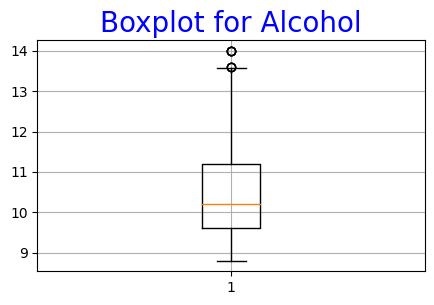

Removing Outliers by Feature Normalization with High Outlier Frequency


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,-0.059418,-0.009466,31.0,54.0,0.99748,3.39,-0.046558,9.8
1,2057,7.2,0.755,0.15,-0.059418,0.045479,14.0,35.0,0.99586,3.33,0.026612,10.0
2,2058,8.4,0.460,0.40,-0.059418,-0.035839,21.0,50.0,0.99774,3.08,0.002222,9.5
3,2059,8.0,0.470,0.40,-0.087989,-0.055619,14.0,25.0,0.99480,3.30,0.002222,11.7
4,2060,6.5,0.340,0.32,-0.045132,-0.081993,8.0,94.0,0.99356,3.23,-0.135989,12.8


In [14]:
norm_wine_test, outlrdf_test=DetectOutLrs(tstwine)
norm_wine_test.head()

In [15]:
def FetSelect(prdwn,tgwn):
    mtrfemdl = feature_selection.RFE(estimator=linear_model.LogisticRegression(),n_features_to_select = 10, step = 0.5)
    mtrfe_trn=mtrfemdl.fit(prdwn,tgwn)
    print("Selected Features: \n",*prdwn.columns[mtrfe_trn.get_support()],sep="\n")
    return prdwn.columns[mtrfe_trn.get_support()]

In [16]:
wine_fets=FetSelect(norm_wine,trnwine['quality'])
wine_clfdf=norm_wine[wine_fets]
wine_clfdf['quality']=trnwine['quality']
wine_clfdf.head(10)

Selected Features: 

Id
fixed acidity
volatile acidity
citric acid
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


,Id,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,30.0,39.0,0.99572,3.33,0.082495,12.1,6
1,1,9.3,0.30,0.73,30.0,67.0,0.99854,3.32,0.018392,12.8,6
2,2,7.1,0.51,0.03,3.0,12.0,0.99660,3.52,0.056854,11.3,7
3,3,8.1,0.87,0.22,11.0,65.0,0.99730,3.20,-0.071352,9.8,5
4,4,8.5,0.36,0.30,10.0,45.0,0.99444,3.20,0.460700,9.5,6
5,5,9.9,0.51,0.44,30.0,134.0,0.99820,3.11,-0.064941,9.6,5
6,6,7.2,0.87,0.00,6.0,18.0,0.99552,3.34,-0.026480,11.3,6
7,7,7.5,0.43,0.32,18.0,40.0,0.99560,3.30,-0.135454,9.7,6
8,8,11.6,0.38,0.55,17.0,40.0,1.00080,3.17,0.056854,9.8,6
9,9,7.8,0.78,0.09,13.0,29.0,0.99682,3.51,-0.096993,9.5,5


In [17]:
wine_clfdf['quality']=numpy.array(wine_clfdf['quality'],str)
wine_clfdf['quality'].value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

In [18]:
mxcn=wine_clfdf['quality'].value_counts().tolist()[0]
mxcn

839

In [19]:
print(wine_clfdf.quality.value_counts())
wine_clfdf=sklearn.utils.resample(wine_clfdf, replace = True, n_samples = len(wine_clfdf)*2, random_state = 0)
mxcn=wine_clfdf['quality'].value_counts().tolist()[0]
mxcn
Quality_Wine6=wine_clfdf[wine_clfdf['quality']=="6"]
Quality_Wine5=wine_clfdf[wine_clfdf['quality']=="5"]
Quality_Wine7=wine_clfdf[wine_clfdf['quality']=="7"]
Quality_Wine8=wine_clfdf[wine_clfdf['quality']=="8"]
Quality_Wine4=wine_clfdf[wine_clfdf['quality']=="4"]
Quality_Wine3=wine_clfdf[wine_clfdf['quality']=="3"]
Quality_Wine5=sklearn.utils.resample(Quality_Wine5, replace = True, n_samples = int(mxcn/len(Quality_Wine5)*len(Quality_Wine5)), random_state = 0)
Quality_Wine7=sklearn.utils.resample(Quality_Wine7, replace = True, n_samples = int(mxcn/len(Quality_Wine7)*len(Quality_Wine7)), random_state = 0)
Quality_Wine8=sklearn.utils.resample(Quality_Wine8, replace = True, n_samples = int(mxcn/len(Quality_Wine8)*len(Quality_Wine8)), random_state = 0)
Quality_Wine4=sklearn.utils.resample(Quality_Wine4, replace = True, n_samples = int(mxcn/len(Quality_Wine4)*len(Quality_Wine4)), random_state = 0)
Quality_Wine3=sklearn.utils.resample(Quality_Wine3, replace = True, n_samples = int(mxcn/len(Quality_Wine3)*len(Quality_Wine3)), random_state = 0)
wine_clfdf1=pandas.concat([Quality_Wine6,Quality_Wine5,Quality_Wine7,Quality_Wine8,Quality_Wine4,Quality_Wine3])
print(wine_clfdf1.quality.value_counts())

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64
5    1683
8    1683
4    1683
3    1683
7    1682
6    1564
Name: quality, dtype: int64


In [20]:
wine_clf=[
    ensemble.AdaBoostClassifier(n_estimators=200, learning_rate=0.9),
    ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=100),
    ensemble.ExtraTreesClassifier(n_estimators=210,max_depth=360)
]
wine_mdls=[
    "Adaptive Boosting",
    "Gradient Boosting",
    "Extra Trees"
]
print(*wine_clf, sep="\n")

AdaBoostClassifier(learning_rate=0.9, n_estimators=200)
GradientBoostingClassifier()
ExtraTreesClassifier(max_depth=360, n_estimators=210)


5    199
8    180
3    172
4    159
7    155
6    133
Name: quality, dtype: int64
_____________________________________________________________________________
                            Adaptive Boosting 
_____________________________________________________________________________


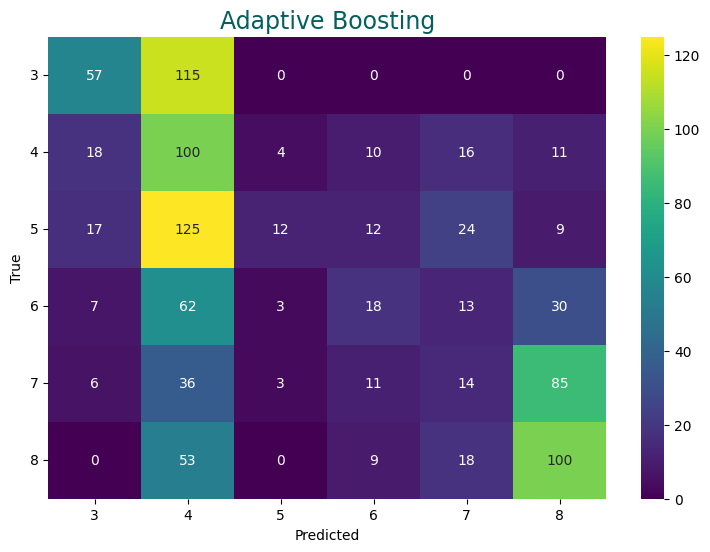


Accuracy: 30.16%


Classification Report for Adaptive Boosting 

              precision    recall  f1-score   support

           3       0.54      0.33      0.41       172
           4       0.20      0.63      0.31       159
           5       0.55      0.06      0.11       199
           6       0.30      0.14      0.19       133
           7       0.16      0.09      0.12       155
           8       0.43      0.56      0.48       180

    accuracy                           0.30       998
   macro avg       0.36      0.30      0.27       998
weighted avg       0.38      0.30      0.27       998

_____________________________________________________________________________
                            Gradient Boosting 
_____________________________________________________________________________


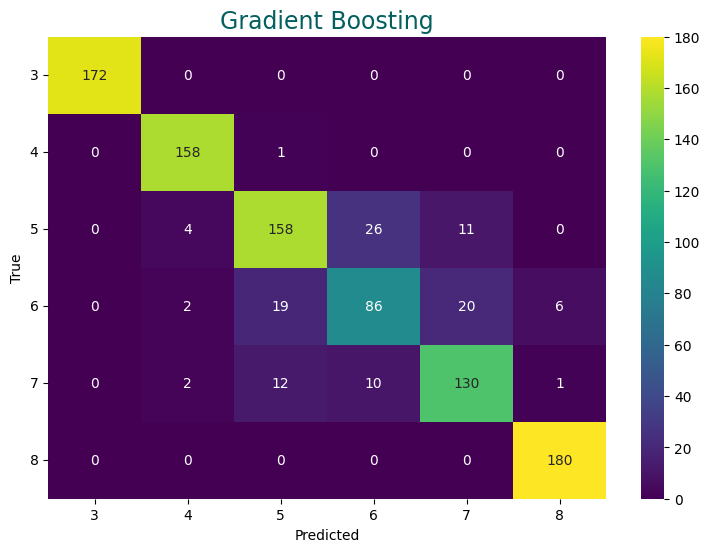


Accuracy: 88.58%


Classification Report for Gradient Boosting 

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       172
           4       0.95      0.99      0.97       159
           5       0.83      0.79      0.81       199
           6       0.70      0.65      0.67       133
           7       0.81      0.84      0.82       155
           8       0.96      1.00      0.98       180

    accuracy                           0.89       998
   macro avg       0.88      0.88      0.88       998
weighted avg       0.88      0.89      0.88       998

_____________________________________________________________________________
                            Extra Trees 
_____________________________________________________________________________


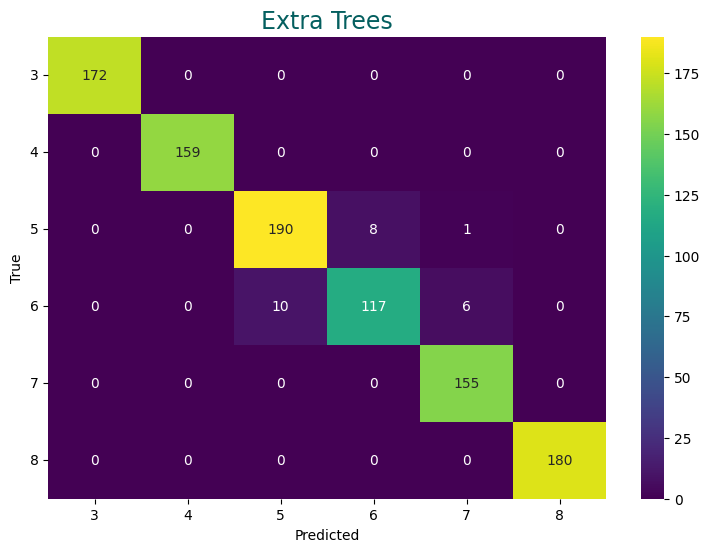


Accuracy: 97.5%


Classification Report for Extra Trees 

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       172
           4       1.00      1.00      1.00       159
           5       0.95      0.95      0.95       199
           6       0.94      0.88      0.91       133
           7       0.96      1.00      0.98       155
           8       1.00      1.00      1.00       180

    accuracy                           0.97       998
   macro avg       0.97      0.97      0.97       998
weighted avg       0.97      0.97      0.97       998

_____________________________________________________________________________


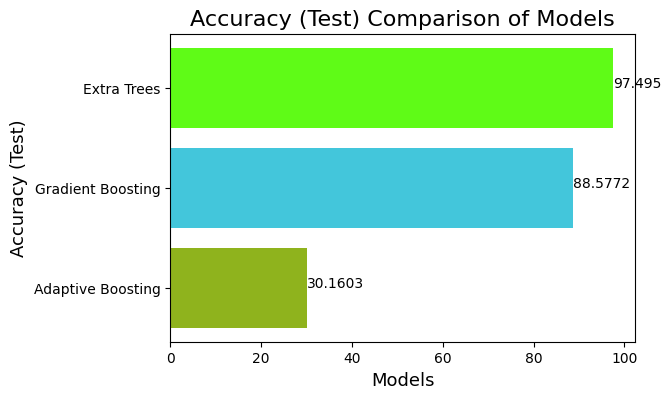

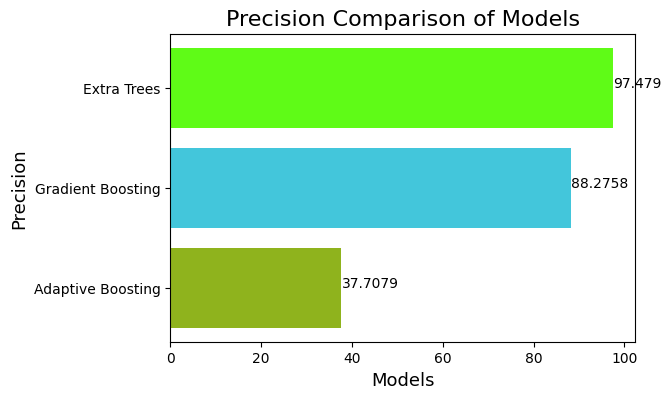

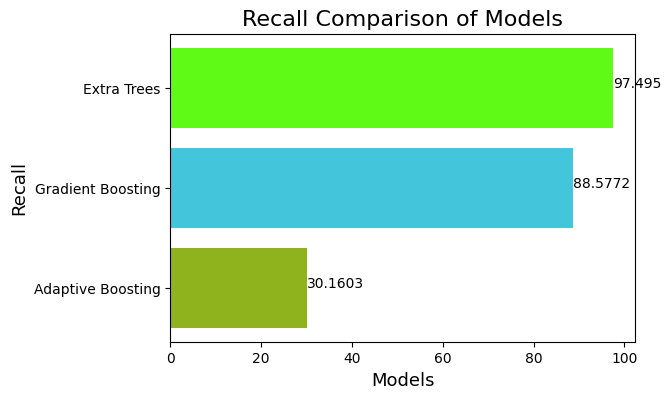

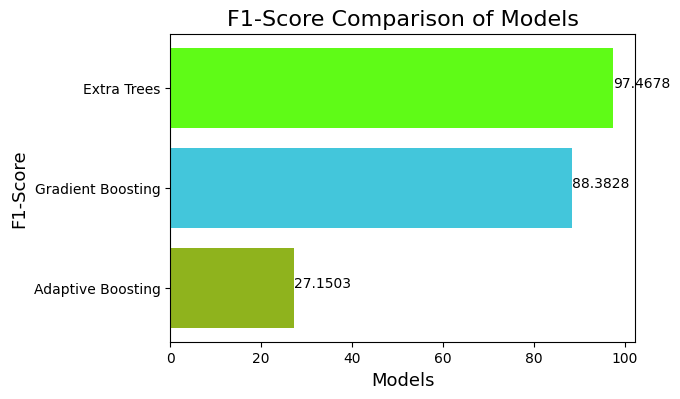

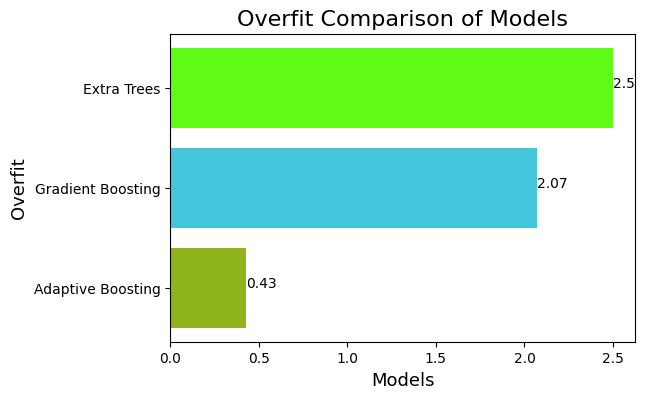

In [21]:
WnTrX, WnTsX, WnTrY, WnTsY=model_selection.train_test_split(wine_clfdf1.drop('quality',axis=1),wine_clfdf1['quality'],test_size=0.1)
print(WnTsY.value_counts())
WnPrec=[]
WnRecl=[]
WnF1=[]
WnAccTs=[]
WnAccTr=[]
ovrwine=[]
print("_____________________________________________________________________________")
for i in range(len(wine_clf)):
    print("                            {} ".format(wine_mdls[i]))
    print("_____________________________________________________________________________")
    wine_clf[i].fit(WnTrX,WnTrY)
    pred_winning=wine_clf[i].predict(WnTsX)
    pred_winnin_trg=wine_clf[i].predict(WnTrX)
    mtscr=round(metrics.accuracy_score(WnTsY,pred_winning)*100,4)
    mtscr_tr=round(metrics.accuracy_score(WnTrY,pred_winnin_trg)*100,4)
    WnPrec.append(round(metrics.precision_score(WnTsY, pred_winning, average='weighted')*100,4))
    WnRecl.append(round(metrics.recall_score(WnTsY, pred_winning, average='weighted')*100,4))
    WnF1.append(round(metrics.f1_score(WnTsY, pred_winning, average='weighted')*100,4))
    WnAccTs.append(mtscr)
    WnAccTr.append(mtscr_tr)
    ovrwine.append(round(abs(mtscr_tr-mtscr),2))
    cnmt=pandas.crosstab(WnTsY, pred_winning, rownames=['True'], colnames=['Predicted'], margins=True)
    pyplot.figure(figsize=(9,6))
    pyplot.title("{}".format(wine_mdls[i]), fontsize=17,color="#045F5F")
    seaborn.heatmap(cnmt.iloc[:6,:6],fmt="d",annot=True,cmap="viridis")
    pyplot.yticks(rotation=0)
    pyplot.show()
    print("\nAccuracy: {}%\n".format(round(mtscr,2)))
    print("\nClassification Report for {} \n\n{}".format(wine_mdls[i],metrics.classification_report(WnTsY, pred_winning)))
    print("_____________________________________________________________________________")

WineRes_Outcome=pandas.DataFrame({
    "Models":wine_mdls,
    "Accuracy (Test)":WnAccTs,
    "Precision":WnPrec,
    "Recall":WnRecl,
    "F1-Score":WnF1,
    "Overfit":ovrwine
})

for i in WineRes_Outcome.columns.tolist()[1:]:
    WineRes_Outcome=WineRes_Outcome.sort_values(by=i,ascending=True)
    pyplot.figure(figsize=(6,4))
    pyplot.title("{} Comparison of Models".format(i),fontsize=16)
    pyplot.barh(WineRes_Outcome['Models'],WineRes_Outcome[i],color=["#8FB31D","#43C6DB","#5FFB17","#F75D59","#FFFF00"])
    pyplot.xlabel("Models",fontsize=13)
    pyplot.ylabel("{}".format(i),fontsize=13)
    for mtix, mtvl in enumerate(WineRes_Outcome[i]):
        pyplot.text(mtvl, mtix, str(mtvl))
    pyplot.show()
WineRes_Outcome.to_csv("WinePred.csv")


In [22]:
WnSorted=WineRes_Outcome.sort_values(by="Accuracy (Test)",ascending=False).reset_index(drop=True)
WnSorted

,Models,Accuracy (Test),Precision,Recall,F1-Score,Overfit
0,Extra Trees,97.4950,97.4790,97.4950,97.4678,2.50
1,Gradient Boosting,88.5772,88.2758,88.5772,88.3828,2.07
2,Adaptive Boosting,30.1603,37.7079,30.1603,27.1503,0.43


In [23]:
bestwinemdlnm=WnSorted['Models'][0]
bestwinemdlidx=wine_mdls.index(bestwinemdlnm)
bestwinemdl=wine_clf[bestwinemdlidx]
bestwinemdl

ExtraTreesClassifier(max_depth=360, n_estimators=210)

In [24]:
tstwine1=tstwine[wine_fets]
testdtpred=bestwinemdl.predict(tstwine1)
submission_quality=pandas.DataFrame()
submission_quality['Id']=tstwine1['Id']
submission_quality['Quality']=testdtpred
submission_quality.to_csv("Submission.csv")
submission_quality

,Id,Quality
0,2056,5
1,2057,6
2,2058,6
3,2059,6
4,2060,6
...,...,...
1367,3423,5
1368,3424,7
1369,3425,5
1370,3426,5
